In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [3]:
faces = np.load('faces.npz')
A = faces['A']

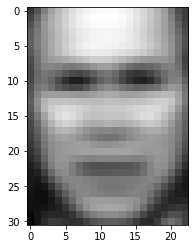

In [4]:
# Compute the mean of the rows of A and plot it as an image
mean = np.mean(A, axis = 0)
plt.imshow( mean.reshape((31, 23)), cmap = 'gray' )

In [5]:
# stack the mean vecor to become a matrix
mean_matrix = np.tile(mean,(766,1))
# define matrix B by subtracting the mean image from the rows of A
B = A - mean_matrix

Text(0.5, 0, 'j')

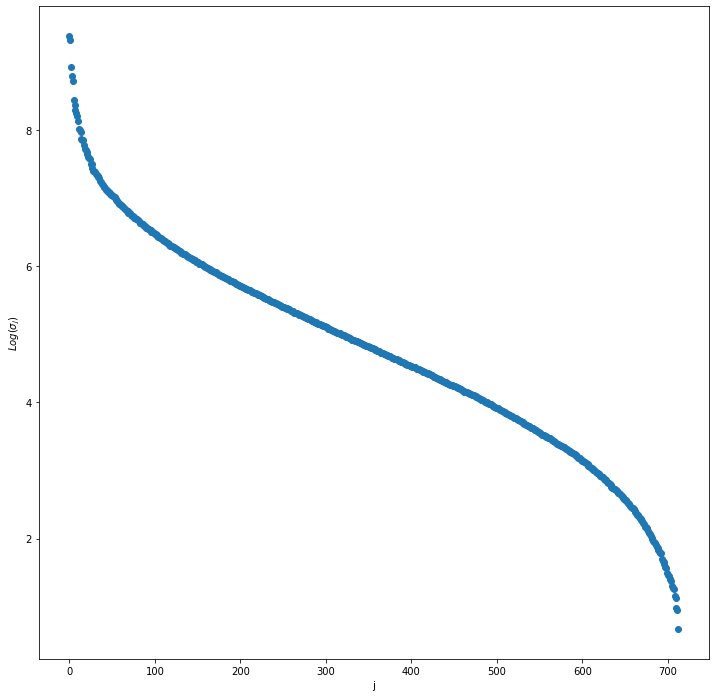

In [16]:
# Perform SVD on B

U, s, Vt = np.linalg.svd(B)

# Plot the log(s_j) vs j
plt.figure(figsize=(12, 12))

plt.plot(np.log(s), 'o')

plt.ylabel('$Log(\sigma_j)$')
plt.xlabel('j')

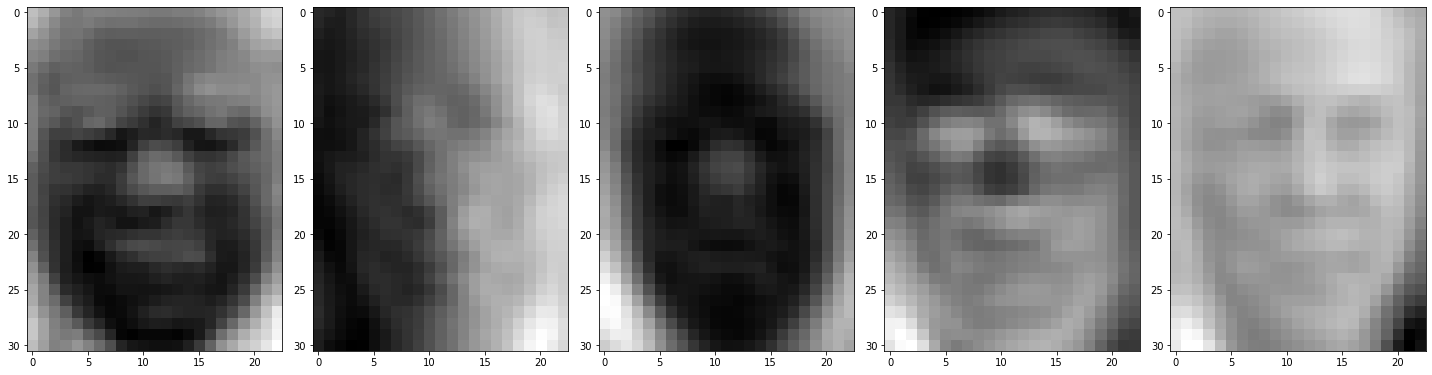

In [7]:
# Plot the first 5 right singular vectors of B as images
fig, axes = plt.subplots(1, 5, figsize=(20,18))

for i in range (5):
  axes[i].imshow( Vt[i, :].reshape((31, 23)), cmap = 'gray' )

fig.tight_layout()

In [8]:
# find the smallest value of r needed for achieving the relative error of 30%

r = 53 # rank of approximation 

s_low_rank = np.zeros(s.shape)

s_low_rank[0:r] = s[0:r]

Sigma_r = np.zeros(B.shape)
np.fill_diagonal(Sigma_r, s_low_rank)

B_r30 = np.dot(U,np.dot(Sigma_r, Vt))

# relative error
rel_err = np.linalg.norm(B - B_r30, 'fro')/np.linalg.norm(B, 'fro')*100
print(rel_err)

29.850447774268257


In [9]:
# find the smallest value of r needed for achieving the relative error of 20%

r = 101 # rank of approximation 

s_low_rank = np.zeros(s.shape)

s_low_rank[0:r] = s[0:r]

Sigma_r = np.zeros(B.shape)
np.fill_diagonal(Sigma_r, s_low_rank)

B_r20 = np.dot(U,np.dot(Sigma_r, Vt))

# relative error
rel_err = np.linalg.norm(B - B_r20, 'fro')/np.linalg.norm(B, 'fro')*100
print(rel_err)

19.95276919297424


In [10]:
# find the smallest value of r needed for achieving the relative error of 10%

r = 207 # rank of approximation 

s_low_rank = np.zeros(s.shape)

s_low_rank[0:r] = s[0:r]

Sigma_r = np.zeros(B.shape)
np.fill_diagonal(Sigma_r, s_low_rank)

B_r10 = np.dot(U,np.dot(Sigma_r, Vt))

# relative error
rel_err = np.linalg.norm(B - B_r10, 'fro')/np.linalg.norm(B, 'fro')*100
print(rel_err)

9.973202413343419


In [11]:
# find the smallest value of r needed for achieving the relative error of 1%

r = 546 # rank of approximation 

s_low_rank = np.zeros(s.shape)

s_low_rank[0:r] = s[0:r]

Sigma_r = np.zeros(B.shape)
np.fill_diagonal(Sigma_r, s_low_rank)

B_r1 = np.dot(U,np.dot(Sigma_r, Vt))

# relative error
rel_err = np.linalg.norm(B - B_r1, 'fro')/np.linalg.norm(B, 'fro')*100
print(rel_err)

0.9926990126315394


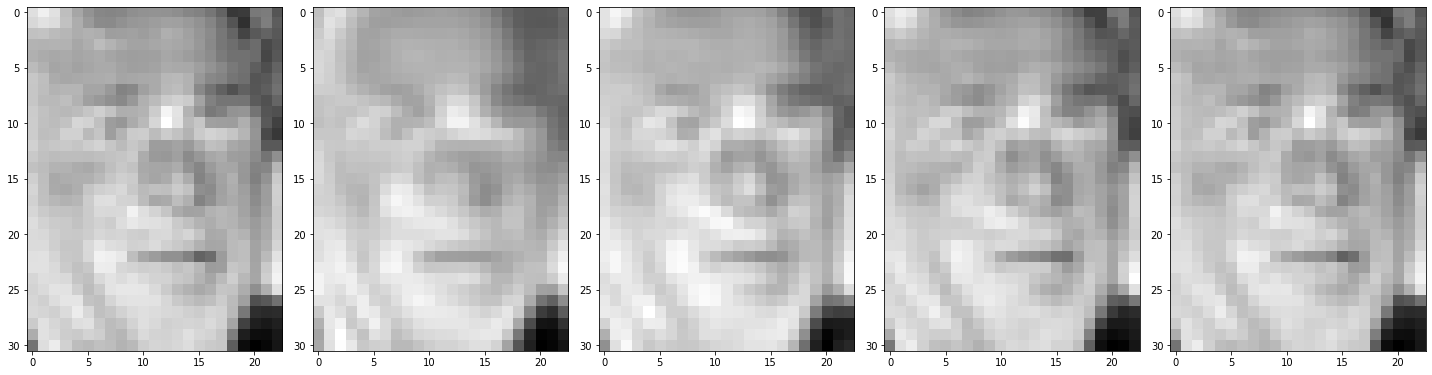

In [12]:
# Plot the first row of B along with the first row of the matrix B_r as images
fig, axes = plt.subplots(1, 5, figsize=(20,18))

axes[0].imshow( B[0, :].reshape((31, 23)), cmap = 'gray' )
axes[1].imshow( B_r30[0, :].reshape((31, 23)), cmap = 'gray' )
axes[2].imshow( B_r20[0, :].reshape((31, 23)), cmap = 'gray' )
axes[3].imshow( B_r10[0, :].reshape((31, 23)), cmap = 'gray' )
axes[4].imshow( B_r1[0, :].reshape((31, 23)), cmap = 'gray' )

fig.tight_layout()